# Get SR data

In [8]:
import pandas as pd
import numpy as np

worry_data1=pd.read_csv('../../raw_data/fs_qs.csv')
worry_data2=pd.read_csv('../../raw_data/v2_q.csv')
print('# Males={}'.format(np.sum(1*(worry_data1['Response']=='Male'))))
print('# Females={}'.format(np.sum(1*(worry_data1['Response']=='Female'))))
print('# Males={}'.format(np.sum(1*(worry_data2['Response']=='Male'))))
print('# Females={}'.format(np.sum(1*(worry_data2['Response']=='Female'))))
print('')

##convert datasets to only subjects that passed qualifying criteria (able to learn 80/20 transitions)
print(len(worry_data1))
bad_subject_ids=['5ddb5eee322886ab83846825','5dda7c406ca7e79e02235371', '5dda8380eb39739cfc403842', '5dda8e6dcb9dd69ea446e804', '5dda93bae08a369e6b41008c', '5dda9c76a4aa269ede527974', '5dda9dd2ce1ce6a0d707441e', '5ddab422dfe9daa1283552b3', '5ddabc6f270f44a124b3624d', '5ddac0201e70daa279ed1d94', '5ddac87035cf74a225b91705', '5ddaca49caee3ea19e2ca4c7', '5ddacbacade462a226666fbb', '5ddad2ebbca2e4a292a7c966', '5ddad8c4961cb3a3a68885ac', '5ddae010326992a384c62f86', '5ddaece71f179ea3c10b2974', '5ddaf37659b1b0a5228f81f6', '5ddafda78f45b9a5df1fe637', '5ddb440f7beb29a9eb4425cf', '5ddb89aeecd14cacddf5b50e', '5ddbac7d9d9e30aec47b22e9', '5ddbb86cb98887b06c587843', '5ddd77bfa46eb3000cb0a64b', '5ddd80d2bca2e4cdd2516929', '5ddd84756d5225cf5f5c8e05', '5ddd8fbd1c219bcfe0aca31f', '5dde7cda2a30acde50c7566a', '5dde7ec68ed6bfddbeb894d3', '5dde8036eb3973dd61d50310', '5dde87529eb3a1000afcb64e', '5dde938de73e61de07e3da38', '5dde9d84b48da3df06773880', '5ddea25cd69072e15ce9bba5', '5ddeacb3393bd3e08a95fd4f', '5ddec06183e309e42df65e25', '5ddec342ff36d7000c7832b6', '5ddecacca4c372000afe28c3', '5dded5007d4595e47e60dc8b', '5ddedb34794e10e459f0e9f6', '5ddee5121e70dae5cc9a7e1c', '5ddf02497d4595e72446c67f', '5ddf4ecbfd5b28ebe2bd0066', '5ddf69b5f83c9fec8fbeee6c', '5ddfd201762dc203e81fd70b']
for sub in bad_subject_ids:
    x=worry_data1['Participant External Session ID']!=sub
    worry_data1=worry_data1[x]
#     print(len(worry_data1))
print('done worry1')
print(len(worry_data2))
for sub in bad_subject_ids:
    x=worry_data2['Participant External Session ID']!=sub
    worry_data2=worry_data2[x]
#     print(len(worry_data2))

# Males=71
# Females=47
# Males=48
# Females=51

17374
done worry1
14600


# Score questionnaires

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import spearmanr as corrS

#set up variables
PSWQ_Scores=[]
MASQ_Scores=[]
OCD_Scores=[]
BDI_Scores=[]
fem_c=0
id_col='Participant External Session ID'
female_subs=[]
fem_scores=[]
male_scores=[]
bad_subject_ids=['5dda7c406ca7e79e02235371', '5dda8380eb39739cfc403842', '5dda8e6dcb9dd69ea446e804', '5dda93bae08a369e6b41008c', '5dda9c76a4aa269ede527974', '5dda9dd2ce1ce6a0d707441e', '5ddab422dfe9daa1283552b3', '5ddabc6f270f44a124b3624d', '5ddac0201e70daa279ed1d94', '5ddac87035cf74a225b91705', '5ddaca49caee3ea19e2ca4c7', '5ddacbacade462a226666fbb', '5ddad2ebbca2e4a292a7c966', '5ddad8c4961cb3a3a68885ac', '5ddae010326992a384c62f86', '5ddaece71f179ea3c10b2974', '5ddaf37659b1b0a5228f81f6', '5ddafda78f45b9a5df1fe637', '5ddb440f7beb29a9eb4425cf', '5ddb89aeecd14cacddf5b50e', '5ddbac7d9d9e30aec47b22e9', '5ddbb86cb98887b06c587843', '5ddd77bfa46eb3000cb0a64b', '5ddd80d2bca2e4cdd2516929', '5ddd84756d5225cf5f5c8e05', '5ddd8fbd1c219bcfe0aca31f', '5dde7cda2a30acde50c7566a', '5dde7ec68ed6bfddbeb894d3', '5dde8036eb3973dd61d50310', '5dde87529eb3a1000afcb64e', '5dde938de73e61de07e3da38', '5dde9d84b48da3df06773880', '5ddea25cd69072e15ce9bba5', '5ddeacb3393bd3e08a95fd4f', '5ddec06183e309e42df65e25', '5ddec342ff36d7000c7832b6', '5ddecacca4c372000afe28c3', '5dded5007d4595e47e60dc8b', '5ddedb34794e10e459f0e9f6', '5ddee5121e70dae5cc9a7e1c', '5ddf02497d4595e72446c67f', '5ddf4ecbfd5b28ebe2bd0066', '5ddf69b5f83c9fec8fbeee6c', '5ddfd201762dc203e81fd70b']
print('len bad subs: {}'.format(len(bad_subject_ids)))

reverse_scored=[1,3,8,10,11]
rs_dict={1:5,2:4,3:3,4:2,5:1}
current_score=0
MASQ_score=0.0
OCD_score=0.0
BDI_score=0.0

Compulsivity=['21','26','27','32','38','33','31','37','23','29','35','22','28','34','24','25','30','36']


#question counters each questionnaire
a=0
b=0
w=0
o=0


reverse_score_counter=0
counter=0
IDs=['Holder']
sc=-1
#get row locations where PSWQ items are
ilocs=[]

#check if they faithfully filled out the questionnaire
rs_items=[]
non_rs_items=[]
sub=1
c_id=1
for vers in range(2):
    if vers==0:
        worry_data=worry_data1
        final_row=17372
    else:
        worry_data=worry_data2
        final_row=14598
        
    for row,data in worry_data.iterrows():
        if worry_data['Response'][row]=='Female':
            current_sub_id=worry_data[id_col][row]
            if current_sub_id not in bad_subject_ids: 
                female_subs.append(worry_data[id_col][row])
            fem_c+=1
        elif worry_data['Response'][row]=='Male':
            current_sub_id=worry_data[id_col][row]
            
        if str(worry_data['Question Key'][row])=='BEGIN QUESTIONNAIRE' or row==final_row:
            sc+=1

            if row!=0:
                if current_sub_id not in bad_subject_ids:
                    PSWQ_Scores.append(current_score)
                    if fem_c==1:
                        fem_scores.append(current_score)
                    else:
                        male_scores.append(current_score)
                    MASQ_Scores.append(MASQ_score)
                    OCD_Scores.append(OCD_score)
                    BDI_Scores.append(BDI_score)
                    if str(worry_data[id_col][row-5])!=IDs[c_id-1]:
                        IDs.append(str(worry_data[id_col][row-5]))
                    c_id+=1
                    
#                 if current_score==0:
#                     print(str(worry_data[id_col][row-5]))
                
            current_score=0
            MASQ_score=0
            OCD_score=0
            BDI_score=0
            w=0
            b=0
            a=0
            o=0
            reverse_score_counter=0
            counter=0
            sub+=1
            rs_items=[]
            non_rs_items=[]
            fem_c=0


        elif str(worry_data['Question Key'][row]).startswith('ps') and not str(worry_data['Question Key'][row]).endswith('quantised'):
            if len(worry_data['Question Key'][row])>5:
                if int(worry_data['Question Key'][row][-2:]) in reverse_scored:
                    rs_items.append(int(worry_data['Response'][row]))
                    current_score+=rs_dict[int(worry_data['Response'][row])]
                    counter+=1
                    w+=1
                    reverse_score_counter+=1
                    ilocs.append(row)
                else:
                    non_rs_items.append(int(worry_data['Response'][row]))
                    current_score+=int(worry_data['Response'][row])
                    w+=1
                    counter+=1
                    ilocs.append(row)
            else:
                if int(worry_data['Question Key'][row][-1]) in reverse_scored:
                    rs_items.append(int(worry_data['Response'][row]))
                    current_score+=rs_dict[int(worry_data['Response'][row])]
                    counter+=1
                    w+=1
                    reverse_score_counter+=1
                    ilocs.append(row)
                else:
                    current_score+=int(worry_data['Response'][row])
                    non_rs_items.append(int(worry_data['Response'][row]))
                    counter+=1
                    w+=1
                    ilocs.append(row)
        elif str(worry_data['Question Key'][row])[-2:] in Compulsivity and not str(worry_data['Question Key'][row]).endswith('quantised'):
            try:
                OCD_score+=int(worry_data['Response'][row])
                o+=1
            except:
                print('wrong q')
       
        elif str(worry_data['Question Key'][row]).startswith('bdi') and str(worry_data['Question Key'][row]).endswith('quantised'):
            BDI_score+=int(worry_data['Response'][row])
            b+=1
        elif len(str(worry_data['Question Key'][row]))>10:
            if str(worry_data['Question Key'][row]).startswith('response-1') and not str(worry_data['Question Key'][row]).endswith('quantised'):
                MASQ_score+=int(worry_data['Response'][row])
                a+=1
        elif str(worry_data['Question Key'][row]).startswith('response-9') and not str(worry_data['Question Key'][row]).endswith('quantised'):
            MASQ_score+=int(worry_data['Response'][row])
            a+=1
        
        


print('# of subs = {}'.format(len(PSWQ_Scores)))
del IDs[0]

m=np.arange(174)
x=np.argsort(MASQ_Scores)
x=list(x)
Median_split_MASQ=[]
for i in range(174):
    if x.index(i)>86:
        Median_split_MASQ.append(1)
    elif x.index(i)<=86:
        Median_split_MASQ.append(0)

x=np.argsort(OCD_Scores)
x=list(x)
Median_split_OCD=[]
for i in range(174):
    if x.index(i)>86:
        Median_split_OCD.append(1)
    elif x.index(i)<=86:
        Median_split_OCD.append(0)


x=np.argsort(PSWQ_Scores)
x=list(x)
Median_split_PSWQ=[]
for i in range(174):
    if x.index(i)>86:
        Median_split_PSWQ.append(1)
    elif x.index(i)<=86:
        Median_split_PSWQ.append(0)

x=np.argsort(BDI_Scores)
x=list(x)
Median_split_BDI=[1 if val>34 else 0 for val in BDI_Scores]
# for i in range(174):
#     if x.index(i)>86:
#         Median_split_BDI.append(1)
#     elif x.index(i)<=86:
#         Median_split_BDI.append(0)
        
r,p=corrS(OCD_Scores,MASQ_Scores)
print("r OCD and MASQ={}, pval={}".format(r,p))



len bad subs: 44
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q
wrong q

# Preprocess choice data

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
#load  in data and just consider columsn of importance for analysis
df_task1=pd.read_csv('../../raw_data/full_images_v1.csv')
df_task2=pd.read_csv('../../raw_data/full_images_v2.csv')

# worry_scores=np.load('worry_scores.npy')

df_task_v1=df_task1[['Participant External Session ID','answer','Attempt','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]

df_task_v2=df_task2[['Participant External Session ID','answer','Attempt','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]



female_subs=[]
select_participants=[]
nude='Fireworks 2.jpg'
IDs_removed=[]
best_subs=[]
bss=[]
correct_answer_dict={}
subs_to_remove_sr=[]
#best answers per condition: lists
rt1=[]
rt1_nonRL=[]
rto=[]
rtf=[]
rp1=[]
rp1_nonRL=[]
rpf=[]
rpo=[]
cp1=[]
cp1_nonRL=[]
cpf=[]
cpo=[]
n2=[]
n2f=[]
n2o=[]
ct1=[]
ct1_nonRL=[]
ctf=[]
cto=[]
n1_pos=[]
n1_neg=[]
n1_pos_comm_count=[]
n1_neg_comm_count=[]
n1f=[]
n1o=[]
cs=0
img_p=[]

fif_row=1
missing=0
acceptable_answers=['1','0',1,0]
all_sub_IDs=[]
value_differential=[]
miss_subs=[]
#best actions taken per order of condition
o1=[]
o2=[]
o3=[]
o4=[]
o5=[]
o6=[]
#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut2_sub=[]
neut1_sub=[]
#first selection fifty round
first_selection=0
missing_data=0
current_subject=0
worry_scores_bad_rt1=[]
worry_scores_good_rt1=[]
t_counter=0
current_acceptable=0
n_count=0
sub_counter=0
common_order_per_sub=[]
choice_data=np.zeros((174,5)) #to be populated below
for version in range(2):
    if version==0:
        df_task_r=df_task_v1
        print(df_task_r.shape)

    if version==1:
        df_task_r=df_task_v2
        print(df_task_r.shape)

        
    temp_row=[]
    ni=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    temp_dict={}
    RL_counter=0
    current_choice_data=[]
    guesses=0
    good_subs=0
    tot_test=0
    common_consecutive_zero=0
    common_consecutive_one=0
    times_action=0
    trial=0
    counter_common=0
    for row,data in df_task_r.iterrows():
        #check if participant is elgibile from rule-out question
        if df_task_r['display'][row]=='practice_rest':
            if df_task_r['Response'][row] in acceptable_answers:
                if int(df_task_r['Correct'][row])==1:
                    current_acceptable=1
                    

        if 'rarest' in str(df_task_r['distractor_key'][row]):
            trial+=1
            fifty_image=df_task_r['image2'][row]
            if df_task_r['Response'][row] in acceptable_answers:
                if 'rarestE'in str(df_task_r['distractor_key'][row]):
                    if 'positive' in str(df_task_r['display'][row]):
                        RL_action=int(df_task_r['Response'][row])
                        if RL_action==1:
                            nonRL_action=0
                        else:
                            nonRL_action=1
                    elif 'negative' in str(df_task_r['display'][row]):
                        nonRL_action=int(df_task_r['Response'][row])
                times_action+=1
                
      
        elif 'rare.' in str(df_task_r['distractor_key'][row]): 
            trial+=1
            if str(df_task_r['display'][row])=='fifty':
                test_thresh=4
            else:
                test_thresh=6
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
                
        elif 'common' in str(df_task_r['distractor_key'][row]):
            trial+=1
            if df_task_r['distractor'][row]==nude:
                select_image=1
            
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
            if df_task_r['forced_choice_response'][row]==0:
                if str(df_task_r['display'][row])=='fifty':
                    counter_common+=trial
                if common_consecutive_zero==0:
                    common_consecutive_zero+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_zero+=1
                    current_row=row
                else:
                    common_consecutive_zero=0
            
            elif int(df_task_r['forced_choice_response'][row])==1:
                if str(df_task_r['display'][row])=='fifty':
                    counter_common+=trial
                if common_consecutive_one==0:
                    common_consecutive_one+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_one+=1
                    current_row=row
                else:
                    common_consecutive_one=0
                                                                               
        elif str(df_task_r['display'][row]).startswith('test'):
            
            if counter==0:
                counter+=1
            t_counter+=1
            
            if str(df_task_r['display'][row][5:])=='fifty':
                try:
                    if int(df_task_r['Attempt'][row])==1:
                        if int(df_task_r['Response'][row])==int(df_task_r['answer'][row]):
                            best_action_tally+=1
                            current_choice_data.append(1)
                        else:
                            current_choice_data.append(0)
                except:
                    missed=1 
            
            
            else:
                if str(df_task_r['test_image1'][row]) != fifty_image:
                    if df_task_r['Response'][row] in acceptable_answers:
                        if int(df_task_r['Response'][row])==nonRL_action:
                            RL_counter+=1
                        best_action_tally+=int(df_task_r['Correct'][row])
                        current_choice_data.append(int(df_task_r['Correct'][row]))
                    
                else:
                    if fif_row==1:
                        if df_task_r['Response'][row] in acceptable_answers:
                            n_count+=int(df_task_r['Correct'][row])
                         
                        else:
                            missing=1
                        fif_row+=1


            if t_counter==test_thresh:
                condition_counter+=1
                conditions.append(df_task_r['display'][row][5:])
                if conditions[counter-1]!='fifty':
                    if best_action_tally<2:
                        best_action_tally=0
                    else:
                        best_action_tally=1
                     


                if np.sum(current_choice_data)==2:
                    current_choice_data=[1]
                else:
                    current_choice_data=[0]

                if conditions[counter-1]=='rare_threat_1':
                    if current_acceptable==1:
                        rt1.append(best_action_tally)
                        choice_data[sub_counter,4]=best_action_tally
                        rt_sub=current_choice_data
                        rt1_nonRL.append(RL_counter)
                        rto.append(condition_counter)
                        if missing!=1:
                            rtf.append(n_count)
                    else:
                        IDs_removed.append(df_task_r['Participant External Session ID'][row])


                elif conditions[counter-1]=='rare_positive_1':

                    if current_acceptable==1:                     
                        rp1.append(best_action_tally)
                        rp1_nonRL.append(RL_counter)
                        choice_data[sub_counter,3]=best_action_tally
                        rp_sub=current_choice_data
                        rpo.append(condition_counter)
                        if missing!=1:
                            rpf.append(n_count)

                elif conditions[counter-1]=='common_positive_1':

                    if current_acceptable==1:

                        cp1.append(best_action_tally)
                        cp1_nonRL.append(RL_counter)
                        choice_data[sub_counter,1]=best_action_tally
                        cp_sub=current_choice_data
                        cpo.append(condition_counter)
                        if missing!=1:
                            cpf.append(n_count)

                elif conditions[counter-1]=='fifty':
                    if current_acceptable==1:
                        if version==0:
                            n1_pos.append(best_action_tally)
                            n1_pos_comm_count.append(counter_common)
                        else:
                            n1_neg.append(best_action_tally)
                            n1_neg_comm_count.append(counter_common)
                    
                    neut1_sub=current_choice_data


                elif conditions[counter-1]=='common_threat_1':
                    if current_acceptable==1:
                        ct1.append(best_action_tally)
                        ct1_nonRL.append(RL_counter)
                        choice_data[sub_counter,2]=best_action_tally
                        ct_sub=current_choice_data
                        cto.append(condition_counter)
                        if missing!=1:
                            ctf.append(n_count)

                elif conditions[counter-1]=='neutral_2':

                    if current_acceptable==1:
                        n2.append(best_action_tally)
                        choice_data[sub_counter,0]=best_action_tally
                        neut2_sub=current_choice_data
                        n2o.append(condition_counter)
                        if missing!=1:
                            n2f.append(n_count)

                trial=0
                counter_common=0
                counter+=1
                missing=0
                fif_row=1
                t_counter=0
                best_action_tally=0
                n_count=0
                cs=0
                skip=0
                tot_test=0
                current_choice_data=[]
                skip_sub=0
                first_selection=0
                ni=0
                RL_counter=0
                if condition_counter==6:
                    
                    condition_counter=0
                    rt_sub=[]
                    ct_sub=[]
                    rp_sub=[]
                    cp_sub=[]
                    neut2_sub=[]
                    neut1_sub=[]
                    guesses=0
                    
                    
                        
                    if current_acceptable!=1:
                        bad='here'
                    else:
                        if select_image==1:
                            select_participants.append(df_task_r['Participant External Session ID'][row])
                        if np.array_equal(choice_data[sub_counter],[1,1,1,1,1]):
                            subs_to_remove_sr.append(current_subject)
                        all_sub_IDs.append(df_task_r['Participant External Session ID'][row])
                        sub_counter+=1
                        current_subject+=1
                    current_acceptable=0
                    select_image=0
                    
#                     print(current_subject)



order_data=[]
num_equal=0
#Order of PSWQ scores relative to Choice data entries
for subj in all_sub_IDs:
    if subj not in IDs:
        print('missing subject in questionnaire data: {}'.format(subj))
    counter=0
    for s in IDs:
        if subj==s:
            order_data.append(counter)
            num_equal+=1
        counter+=1
    
# print('Order_Choice_Data_Subs: {}'.format(all_sub_IDs))
# IDs=[IDs[i] for i in order_data]

# # print('Order_SR_Subs: {}'.format(IDs))

# # print(choice_data)
# choice_data = choice_data.astype(int)

Median_split_OCD=[Median_split_OCD[i] for i in order_data]
OCD_Ordered=[OCD_Scores[i] for i in order_data]

ocd_save_d=np.load('median_split_compulsivity_hf.npy')

not_matching=0
for i in range(len(OCD_Ordered)):
    if ocd_save_d[i]!=OCD_Ordered[i]:
        not_matching+=1

print('number not matching saved and just-run OCD measure: {}'.format(not_matching))

# Median_split_PSWQ=[Median_split_PSWQ[i] for i in order_data]
# PSWQ_Ordered=[PSWQ_Scores[i] for i in order_data]

# Median_split_BDI=[Median_split_BDI[i] for i in order_data]
# BDI_Ordered=[BDI_Scores[i] for i in order_data]

# Median_split_MASQ=[Median_split_MASQ[i] for i in order_data]
# MASQ_Ordered=[MASQ_Scores[i] for i in order_data]

# np.save('median_split_compulsivity_hf',Median_split_OCD)
# np.save('compulsivity_ordered_hf',OCD_Ordered)

# np.save('median_split_worry_hf',Median_split_PSWQ)
# np.save('worry_ordered_hf',PSWQ_Ordered)

# np.save('median_split_depression_clinicalCutoff',Median_split_BDI)
# np.save('depression_ordered_clinicalCutoff',BDI_Ordered)

# np.save('median_split_anxious_arousal_hf',Median_split_MASQ)
# np.save('anxious_arousal_ordered_hf',MASQ_Ordered)

# BDI_Ordered=[BDI_Scores[i] for i in order_data]
# PSWQ_cleaned_ordered=np.delete(PSWQ_Scores_Ordered,(subs_to_remove_sr),axis=0)
# MASQ_cleaned_ordered=np.delete(MASQ_Ordered,(subs_to_remove_sr),axis=0)
# BDI_cleaned_ordered=np.delete(BDI_Ordered,(subs_to_remove_sr),axis=0)
# OCD_cleaned_ordered=np.delete(OCD_Ordered,(subs_to_remove_sr),axis=0)

# ct1=np.delete(ct1,(subs_to_remove_sr),axis=0)
# rt1=np.delete(rt1,(subs_to_remove_sr),axis=0)
# cp1=np.delete(cp1,(subs_to_remove_sr),axis=0)
# rp1=np.delete(rp1,(subs_to_remove_sr),axis=0)
# n2=np.delete(n2,(subs_to_remove_sr),axis=0)


print('subs to remove length: {}'.format(len(subs_to_remove_sr)))

# print(len(PSWQ_cleaned_ordered))
#np.save('choice_data_binned_2',choice_data)
# np.save('PSWQ_cleaned_ordered_male',PSWQ_cleaned_ordered)
# np.save('MASQ_cleaned_ordered_male',MASQ_cleaned_ordered)
# np.save('BDI_cleaned_ordered_male',BDI_cleaned_ordered)



# IDs_ordered=[IDs[i] for i in order_data]
print('DONE') 
# r,pval=corrS(n1_pos,n1_pos_comm_count)
# print(np.mean())
# print('corr order pos 50: {}, pval:{}'.format(r,pval))
# print('')
# r2,pval2=corrS(n1_neg,n1_neg_comm_count)
# print('corr order neg 50: {}, pval:{}'.format(r2,pval2))


(75325, 15)
(63840, 15)
number not matching saved and just-run OCD measure: 174
subs to remove length: 42
DONE


In [20]:
not_matching=0
for i in range(len(Median_split_OCD)):
    if OCD_Ordered[i]!=sum_ocd[i]:
        not_matching+=1
print(not_matching)
# print()
# OCD_Ordered=[i-18 for i in OCD_Ordered]
print(OCD_Ordered)
print(sum_ocd.values)

0
[7, 20, 22, 12, 35, 11, 17, 42, 5, 40, 35, 19, 0, 21, 29, 2, 34, 15, 25, 9, 17, 13, 21, 12, 25, 8, 30, 14, 43, 5, 27, 38, 18, 13, 36, 5, 38, 35, 28, 28, 64, 3, 2, 35, 18, 43, 22, 37, 28, 33, 12, 26, 13, 45, 30, 1, 38, 14, 36, 17, 26, 20, 14, 13, 27, 24, 31, 50, 26, 10, 29, 22, 24, 44, 21, 43, 37, 21, 8, 33, 46, 30, 3, 18, 10, 29, 18, 29, 22, 38, 32, 21, 43, 8, 9, 14, 10, 29, 27, 21, 17, 18, 8, 21, 10, 29, 21, 13, 34, 19, 28, 34, 57, 8, 3, 21, 4, 8, 31, 26, 7, 14, 4, 28, 1, 8, 14, 55, 4, 25, 15, 29, 25, 35, 28, 26, 12, 31, 16, 28, 31, 26, 25, 34, 12, 13, 15, 34, 2, 12, 31, 7, 19, 0, 33, 26, 11, 20, 6, 27, 32, 51, 26, 13, 3, 10, 23, 25, 28, 44, 21, 25, 17, 54]
[ 7 20 22 12 35 11 17 42  5 40 35 19  0 21 29  2 34 15 25  9 17 13 21 12
 25  8 30 14 43  5 27 38 18 13 36  5 38 35 28 28 64  3  2 35 18 43 22 37
 28 33 12 26 13 45 30  1 38 14 36 17 26 20 14 13 27 24 31 50 26 10 29 22
 24 44 21 43 37 21  8 33 46 30  3 18 10 29 18 29 22 38 32 21 43  8  9 14
 10 29 27 21 17 18  8 21 10 29 21 13 34

# Create dataset for EFA analysis (extract individual questions)

column_titles:['bdi_1', 'bdi_2', 'bdi_3', 'bdi_4', 'bdi_5', 'bdi_6', 'bdi_7', 'bdi_8', 'bdi_9', 'bdi_10', 'bdi_11', 'bdi_12', 'bdi_13', 'bdi_14', 'bdi_15', 'bdi_16', 'bdi_17', 'bdi_18', 'bdi_19', 'bdi_20', 'bdi_21', 'masq_1', 'masq_2', 'masq_3', 'masq_4', 'masq_5', 'masq_6', 'masq_7', 'masq_8', 'masq_9', 'masq_10', 'ocd_1', 'ocd_2', 'ocd_3', 'ocd_4', 'ocd_5', 'ocd_6', 'ocd_7', 'ocd_8', 'ocd_9', 'ocd_10', 'ocd_11', 'ocd_12', 'ocd_13', 'ocd_14', 'ocd_15', 'ocd_16', 'ocd_17', 'ocd_18', 'Mania_1', 'Mania_2', 'Mania_3', 'Mania_4', 'Mania_5', 'pswq_1', 'pswq_2', 'pswq_3', 'pswq_4', 'pswq_5', 'pswq_6', 'pswq_7', 'pswq_8', 'pswq_9', 'pswq_10', 'pswq_11', 'pswq_12', 'pswq_13', 'pswq_14', 'pswq_15', 'pswq_16']


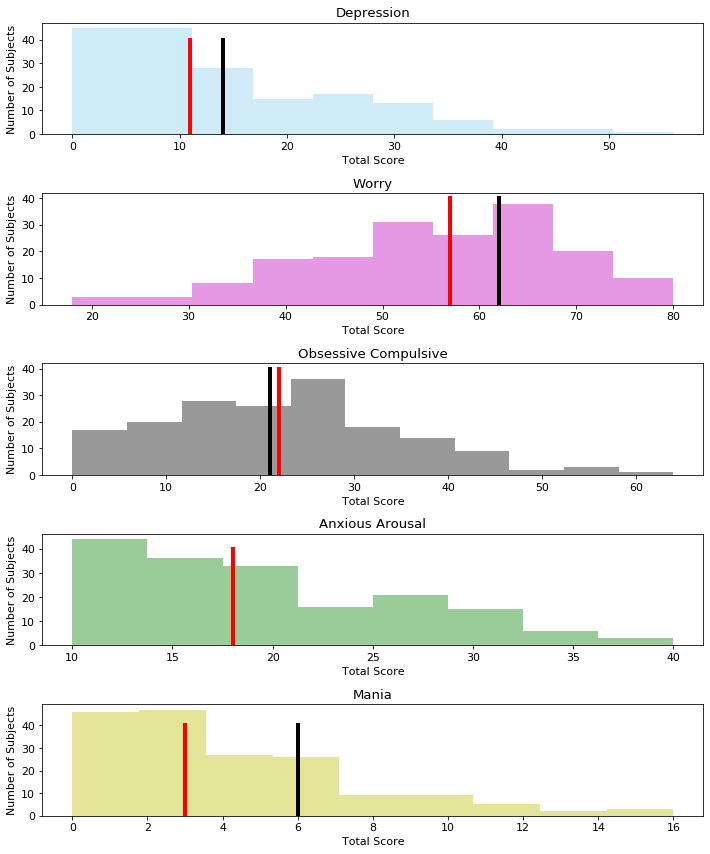

7165.155122309023 0.0
0.8326059956514447


/home/paul/.local/lib/python3.7/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


v
[ 1.61136172e+01  4.90554540e+00  4.09695156e+00  1.75236547e+00
  1.45419438e+00  1.20162642e+00  1.06131505e+00  8.84898770e-01
  7.99062772e-01  7.67356555e-01  6.99307390e-01  5.84889229e-01
  5.27279666e-01  4.56148420e-01  4.41644533e-01  4.25680786e-01
  4.12786550e-01  3.34203067e-01  3.00562222e-01  2.72525620e-01
  2.09268328e-01  1.95402544e-01  1.88102763e-01  1.23551515e-01
  1.19202455e-01  1.02487142e-01  8.03606874e-02  4.99414544e-02
  1.46372072e-03 -1.38847353e-02 -2.79260867e-02 -4.43145469e-02
 -7.12032576e-02 -8.29671993e-02 -8.83298885e-02 -1.09874974e-01
 -1.33790744e-01 -1.56029667e-01 -1.80993703e-01 -1.90414541e-01
 -2.05552756e-01 -2.20119951e-01 -2.27523405e-01 -2.54758960e-01
 -2.56868190e-01 -2.70816149e-01 -2.91928521e-01 -2.99995137e-01
 -3.26131938e-01 -3.38448568e-01 -3.44569111e-01 -3.62042409e-01
 -3.69173143e-01 -3.82817947e-01 -4.16871183e-01 -4.21953819e-01
 -4.37554975e-01 -4.59035586e-01 -4.61774467e-01 -4.71681505e-01
 -4.83062236e-01 -4.984

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.decomposition import PCA, IncrementalPCA, FactorAnalysis as FA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import *
import pandas as pd
import seaborn as sns
import csv

# np.save('subject_order_data',all_sub_IDs)
x=np.load('subject_order_data.npy')
all_sub_IDs=list(x)

#get BDI data
all_column_titles=[]
all_series=[]
x=worry_data1["Question Key"]=="bdi1-quantised"
reduced_df1=worry_data1["Participant External Session ID"][x]
reduced_df1=reduced_df1.reset_index(drop=True)
x=worry_data2["Question Key"]=="bdi1-quantised"
reduced_df2=worry_data2["Participant External Session ID"][x]
reduced_df2=reduced_df2.reset_index(drop=True)
participant_data=pd.concat([reduced_df1,reduced_df2],axis=0,ignore_index=True)


for i in range(1,22,1):
    exec('x=worry_data1["Question Key"]=="bdi{}-quantised"'.format(i))
    exec('bdi_{}_1=worry_data1["Response"][x]'.format(i))
    exec('bdi_{}_1=bdi_{}_1.reset_index(drop=True)'.format(i,i))
    exec('x=worry_data2["Question Key"]=="bdi{}-quantised"'.format(i))
    exec('bdi_{}_2=worry_data2["Response"][x]'.format(i))
    exec('bdi_{}_2=bdi_{}_2.reset_index(drop=True)'.format(i,i))
    exec('bdi_{}=pd.concat([bdi_{}_1,bdi_{}_2],axis=0,ignore_index=True)'.format(i,i,i))
    exec('all_column_titles.append("bdi_{}")'.format(i))
    exec('all_series.append(bdi_{})'.format(i))
    



#get MASQ data
for i in range(9,19,1):
    exec('x=worry_data1["Question Key"]=="response-{}-quantised"'.format(i))
    exec('masq_{}_1=worry_data1["Response"][x]'.format(i-8))
    exec('masq_{}_1=masq_{}_1.reset_index(drop=True)'.format(i-8,i-8))
    exec('x=worry_data2["Question Key"]=="response-{}-quantised"'.format(i))
    exec('masq_{}_2=worry_data2["Response"][x]'.format(i-8))
    exec('masq_{}_2=masq_{}_2.reset_index(drop=True)'.format(i-8,i-8))
    exec('masq_{}=pd.concat([masq_{}_1,masq_{}_2],axis=0,ignore_index=True)'.format(i-8,i-8,i-8))
    exec('all_column_titles.append("masq_{}")'.format(i-8))
    exec('all_series.append(masq_{})'.format(i-8))
   


#get OCD data
for i in range(21,39,1):
    exec('x=worry_data1["Question Key"]=="response-{}-quantised"'.format(i))
    exec('ocd_{}_1=worry_data1["Response"][x]'.format(i-20))
    exec('ocd_{}_1=ocd_{}_1.reset_index(drop=True)'.format(i-20,i-20))
    exec('x=worry_data2["Question Key"]=="response-{}-quantised"'.format(i))
    exec('ocd_{}_2=worry_data2["Response"][x]'.format(i-20))
    exec('ocd_{}_2=ocd_{}_2.reset_index(drop=True)'.format(i-20,i-20))
    exec('ocd_{}=pd.concat([ocd_{}_1,ocd_{}_2],axis=0,ignore_index=True)'.format(i-20,i-20,i-20))
    exec('all_column_titles.append("ocd_{}")'.format(i-20))
    exec('all_series.append(ocd_{})'.format(i-20))
   
    
#for mania data
for i in range(1,6,1):
    exec('x=worry_data1["Question Key"]=="Mania{}-quantised"'.format(i))
    exec('Mania_{}_1=worry_data1["Response"][x]'.format(i))
    exec('Mania_{}_1=Mania_{}_1.reset_index(drop=True)'.format(i,i))
    exec('x=worry_data2["Question Key"]=="Mania{}-quantised"'.format(i))
    exec('Mania_{}_2=worry_data2["Response"][x]'.format(i))
    exec('Mania_{}_2=Mania_{}_2.reset_index(drop=True)'.format(i,i))
    exec('Mania_{}=pd.concat([Mania_{}_1,Mania_{}_2],axis=0,ignore_index=True)'.format(i,i,i))
    exec('all_column_titles.append("Mania_{}")'.format(i))
    exec('all_series.append(Mania_{})'.format(i))
   
# get PSWQ data
reverse_scored=[1,3,8,10,11]
rs_dict={'1':5,'2':4,'3':3,'4':2,'5':1}
for i in range(1,17,1):
    exec('x=worry_data1["Question Key"]=="pswq{}-quantised"'.format(i))
    exec('pswq_{}_1=worry_data1["Response"][x]'.format(i))
    exec('pswq_{}_1=pswq_{}_1.reset_index(drop=True)'.format(i,i))
#     print('old')
#     exec('print(pswq_{}_1)'.format(i))
    if i in reverse_scored:
        exec('pswq_{}_1=pswq_{}_1.replace(rs_dict)'.format(i,i,i))
#         print('new')
#         exec('print(pswq_{}_1)'.format(i))
    exec('x=worry_data2["Question Key"]=="pswq{}-quantised"'.format(i))
    exec('pswq_{}_2=worry_data2["Response"][x]'.format(i))
    exec('pswq_{}_2=pswq_{}_2.reset_index(drop=True)'.format(i,i))
    if i in reverse_scored:
        exec('pswq_{}_2=pswq_{}_2.replace(rs_dict)'.format(i,i))
    exec('pswq_{}=pd.concat([pswq_{}_1,pswq_{}_2],axis=0,ignore_index=True)'.format(i,i,i))
    exec('all_column_titles.append("pswq_{}")'.format(i))
    exec('all_series.append(pswq_{})'.format(i))


self_report_dataframe=pd.concat(all_series,axis=1,ignore_index=True)
self_report_dataframe.columns=all_column_titles
print('column_titles:{}'.format(all_column_titles))
self_report_dataframe=self_report_dataframe.astype('int')
self_report_dataframe=self_report_dataframe.set_index(participant_data)
self_report_dataframe=self_report_dataframe.reindex(all_sub_IDs)
bdi_sr=self_report_dataframe[[x for x in self_report_dataframe.columns if 'bdi' in x]]
mania_sr=self_report_dataframe[[x for x in self_report_dataframe.columns if 'Mania' in x]]
worry_sr=self_report_dataframe[[x for x in self_report_dataframe.columns if 'pswq' in x]]
ocd_sr=self_report_dataframe[[x for x in self_report_dataframe.columns if 'ocd' in x]]
masq_sr=self_report_dataframe[[x for x in self_report_dataframe.columns if 'masq' in x]]

csvn=[['bdi_median','bdi_std',
     'worry_median','worry_std',
     'ocd_median','ocd_std',
     'masq_median','masq_std',
     'mania_median','mania_std']]
sum_bdi=bdi_sr.sum(axis=1)-21
clinical_cutoff_bdi=[1 if x>13 else 0 for x in sum_bdi]
np.save('clin_cutoff_bdi',clinical_cutoff_bdi)
sum_mania=mania_sr.sum(axis=1)-5
clinical_cutoff_mania=[1 if x>5 else 0 for x in sum_mania]
np.save('clin_cutoff_mania',clinical_cutoff_mania)
sum_worry=worry_sr.sum(axis=1)
clinical_cutoff_worry=[1 if x>61 else 0 for x in sum_worry]
np.save('clin_cutoff_worry',clinical_cutoff_worry)
sum_ocd=ocd_sr.sum(axis=1)-18

clinical_cutoff_ocd=[1 if x>20 else 0 for x in sum_ocd]
np.save('clin_cutoff_ocd',clinical_cutoff_ocd)
median_ocd=[1 if x>np.median(sum_ocd) else 0 for x in sum_ocd]
np.save('median_ocd',clinical_cutoff_ocd)

sum_masq=masq_sr.sum(axis=1)
clinical_cutoff_masq=[1 if x>18 else 0 for x in sum_masq]
np.save('clin_cutoff_masq',clinical_cutoff_masq)
median_masq=[1 if x>np.median(sum_masq) else 0 for x in sum_masq]
np.save('median_masq',median_masq)


np_mania=np.asarray(sum_mania)
np_ocd=np.asarray(sum_ocd)
line=[np.median(sum_bdi),np.std(sum_bdi),
      np.median(sum_worry),np.std(sum_worry),
     np.median(sum_ocd),np.std(sum_ocd),
     np.median(sum_masq),np.std(sum_masq),
     np.median(sum_mania),np.std(sum_mania)]
csvn.append(line)
# with open('medians_and_std.csv','a') as f:
#     w=csv.writer(f)
#     w.writerows(csvn)

#plot self-report measures  

font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : 11}

matplotlib.rc('font', **font)

f, axs = plt.subplots(5, 1, figsize=(10, 12),sharex=False)

ax0=sns.distplot(sum_bdi, hist=True,kde=False,color="skyblue", ax=axs[0])
ax0.set(title='Depression',xlabel='Total Score',ylabel='Number of Subjects')
ax0.plot([14.,14.], [0,40], "k",color='k',linewidth=4)
ax0.plot([np.median(sum_bdi),np.median(sum_bdi)],[0,40],"k",color='r',linewidth=4)

ax1=sns.distplot(sum_worry, hist=True,kde=False,color="m", ax=axs[1])
ax1.set(title='Worry',xlabel='Total Score',ylabel='Number of Subjects')
ax1.plot([62.,62.], [0,40], "k",color='k',linewidth=4)
ax1.plot([np.median(sum_worry),np.median(sum_worry)],[0,40],"k",color='r',linewidth=4)

ax1=sns.distplot(sum_ocd, hist=True,kde=False,color="k", ax=axs[2])
ax1.set(title='Obsessive Compulsive',xlabel='Total Score',ylabel='Number of Subjects')
ax1.plot([21.,21.], [0,40], "k",color='k',linewidth=4)
ax1.plot([np.median(sum_ocd),np.median(sum_ocd)],[0,40],"k",color='r',linewidth=4)

ax1=sns.distplot(sum_masq, hist=True,kde=False,color="g", ax=axs[3])
ax1.set(title='Anxious Arousal',xlabel='Total Score',ylabel='Number of Subjects')
ax1.plot([18.,18.], [0,40], "k",color='k',linewidth=4)
ax1.plot([np.median(sum_masq),np.median(sum_masq)],[0,40],"k",color='r',linewidth=4)

ax1=sns.distplot(sum_mania, hist=True,kde=False,color="y", ax=axs[4])
ax1.set(title='Mania',xlabel='Total Score',ylabel='Number of Subjects')
ax1.plot([6.,6.], [0,40], "k",color='k',linewidth=4)
ax1.plot([np.median(sum_mania),np.median(sum_mania)],[0,40],"k",color='r',linewidth=4)

plt.tight_layout()
plt.savefig('high_res_questionnaires.png', dpi=300)
plt.show()


# for i in range(len(self_report_dataframe.index[:])):
#     if self_report_dataframe.index[i]!=all_sub_IDs[i]:
#         print('participant not in order of choice data: {}'.format(i))
# np.save('mania_scores',np_mania)
# np.save('oci_r_scores',np_ocd)
median_split_ocd=[]
x=np.argsort(np_ocd)
x=list(x)
for i in range(174):
    if x.index(i)>86:
        median_split_ocd.append(1)
    elif x.index(i)<=86:
        median_split_ocd.append(0)
median_split_ocd=np.asarray(median_split_ocd)
# np.save('median_split_oci_r',median_split_ocd)

median_split_mania=[]
x=np.argsort(np_mania)
x=list(x)
for i in range(174):
    if x.index(i)>86:
        median_split_mania.append(1)
    elif x.index(i)<=86:
        median_split_mania.append(0)
median_split_mania=np.asarray(median_split_mania)
# np.save('median_split_mania',median_split_mania)
# print(sum_bdi.corr(sum_mania))
# print(sum_worry.corr(sum_mania))
# print(sum_ocd.corr(sum_mania))
# print(sum_masq.corr(sum_mania))

corr_sr=self_report_dataframe.corr('spearman')
# corr_sr.to_csv('correlations_self_report.csv')

x = self_report_dataframe.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_self_report_data = pd.DataFrame(x_scaled)
scaled_self_report_data.columns=all_column_titles

data_top = self_report_dataframe.head()  
    
# iterating the columns 
# for row in range(len(self_report_dataframe.index)): 
#     if self_report_dataframe.index[row]==all_sub_IDs[row]:
#         x='same'
#     else:
#         print('FALSE')

#self_report_dataframe.to_csv('all_self_report_data.csv')



#factor_loadings_df.to_csv('factor_loadings.csv')


# Do initial tests to see if data is suitable for EFA
chi_square_value,p_value=calculate_bartlett_sphericity(self_report_dataframe)
print(chi_square_value, p_value)
kmo_all,kmo_model=calculate_kmo(self_report_dataframe)
print(kmo_model)

fa = FactorAnalyzer(rotation='varimax')
fa.fit(self_report_dataframe)
fa.transform
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print('v')
print(v)
print('')
print('ev')
print(ev)
#Transform values via factor loadings and save to array
tf_values=fa.transform(self_report_dataframe)
#np.save('efa_tranformed_values_varimax',tf_values)

#Get and save loadings
fa_load=np.transpose(fa.loadings_)
#np.save('factor_loadings_EFA_varimax',fa_load)
# print(ev)




# Non - binned data

In [32]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
#load  in data and just consider columsn of importance for analysis
df_task1=pd.read_csv('../../raw_data/full_images_v1.csv')
df_task2=pd.read_csv('../../raw_data/full_images_v2.csv')


df_task_v1=df_task1[['Participant External Session ID','answer','Attempt','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]

df_task_v2=df_task2[['Participant External Session ID','answer','Attempt','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]



female_subs=[]
select_participants=[]
IDs_removed=[]
best_subs=[]
bss=[]
correct_answer_dict={}
subs_to_remove_sr=[]
#best answers per condition: lists
rt1=[]
rt1_nonRL=[]
rto=[]
rtf=[]
rp1=[]
rp1_nonRL=[]
rpf=[]
rpo=[]
cp1=[]
cp1_nonRL=[]
cpf=[]
cpo=[]
n2=[]
n2f=[]
n2o=[]
ct1=[]
ct1_nonRL=[]
ctf=[]
cto=[]
n1_pos=[]
n1_neg=[]
n1_pos_comm_count=[]
n1_neg_comm_count=[]
n1f=[]
n1o=[]
cs=0
img_p=[]

fif_row=1
missing=0
acceptable_answers=['1','0',1,0]
all_sub_IDs=[]
value_differential=[]
miss_subs=[]
#best actions taken per order of condition
o1=[]
o2=[]
o3=[]
o4=[]
o5=[]
o6=[]
#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut2_sub=[]
neut1_sub=[]
#first selection fifty round
first_selection=0
missing_data=0
current_subject=0
worry_scores_bad_rt1=[]
worry_scores_good_rt1=[]
t_counter=0
current_acceptable=0
n_count=0
sub_counter=0
common_order_per_sub=[]
choice_data=np.zeros((219,5)) #to be populated below
for version in range(2):
    if version==0:
        df_task_r=df_task_v1
        print(df_task_r.shape)

    if version==1:
        df_task_r=df_task_v2
        print(df_task_r.shape)

        
    temp_row=[]
    ni=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    temp_dict={}
    RL_counter=0
    current_choice_data=[]
    guesses=0
    good_subs=0
    tot_test=0
    common_consecutive_zero=0
    common_consecutive_one=0
    times_action=0
    trial=0
    counter_common=0
    for row,data in df_task_r.iterrows():
        #check if participant is elgibile from rule-out question
        if df_task_r['display'][row]=='practice_rest':
            if df_task_r['Response'][row] in acceptable_answers:
                if int(df_task_r['Correct'][row])==1:
                    current_acceptable=1
                    

        if 'rarest' in str(df_task_r['distractor_key'][row]):
            trial+=1
            fifty_image=df_task_r['image2'][row]
            if df_task_r['Response'][row] in acceptable_answers:
                if 'rarestE'in str(df_task_r['distractor_key'][row]):
                    if 'positive' in str(df_task_r['display'][row]):
                        RL_action=int(df_task_r['Response'][row])
                        if RL_action==1:
                            nonRL_action=0
                        else:
                            nonRL_action=1
                    elif 'negative' in str(df_task_r['display'][row]):
                        nonRL_action=int(df_task_r['Response'][row])
                times_action+=1
                
      
        elif 'rare.' in str(df_task_r['distractor_key'][row]): 
            trial+=1
            if str(df_task_r['display'][row])=='fifty':
                test_thresh=4
            else:
                test_thresh=6
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
                
        elif 'common' in str(df_task_r['distractor_key'][row]):
            trial+=1
            if df_task_r['distractor'][row]==nude:
                select_image=1
            
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
            if df_task_r['forced_choice_response'][row]==0:
                if str(df_task_r['display'][row])=='fifty':
                    counter_common+=trial
                if common_consecutive_zero==0:
                    common_consecutive_zero+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_zero+=1
                    current_row=row
                else:
                    common_consecutive_zero=0
            
            elif int(df_task_r['forced_choice_response'][row])==1:
                if str(df_task_r['display'][row])=='fifty':
                    counter_common+=trial
                if common_consecutive_one==0:
                    common_consecutive_one+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_one+=1
                    current_row=row
                else:
                    common_consecutive_one=0
                                                                               
        elif str(df_task_r['display'][row]).startswith('test'):
            
            if counter==0:
                counter+=1
            t_counter+=1
            
            if str(df_task_r['display'][row][5:])=='fifty':
                try:
                    if int(df_task_r['Attempt'][row])==1:
                        if int(df_task_r['Response'][row])==int(df_task_r['answer'][row]):
                            best_action_tally+=1
                            current_choice_data.append(1)
                        else:
                            current_choice_data.append(0)
                except:
                    missed=1 
            
            
            else:
                if str(df_task_r['test_image1'][row]) != fifty_image:
                    if df_task_r['Response'][row] in acceptable_answers:
                        if int(df_task_r['Response'][row])==nonRL_action:
                            RL_counter+=1
                        best_action_tally+=int(df_task_r['Correct'][row])
                        current_choice_data.append(int(df_task_r['Correct'][row]))
                    
                else:
                    if fif_row==1:
                        if df_task_r['Response'][row] in acceptable_answers:
                            n_count+=int(df_task_r['Correct'][row])
                         
                        else:
                            missing=1
                        fif_row+=1


            if t_counter==test_thresh:
                condition_counter+=1
                conditions.append(df_task_r['display'][row][5:])
                if conditions[counter-1]!='fifty':
                    if best_action_tally<2:
                        best_action_tally=0
                    else:
                        best_action_tally=1
                     


                if np.sum(current_choice_data)==2:
                    current_choice_data=[1]
                else:
                    current_choice_data=[0]

                if conditions[counter-1]=='rare_threat_1':
                    if current_acceptable==1:
                        rt1.append(best_action_tally)
                        choice_data[sub_counter,4]=best_action_tally
                        rt_sub=current_choice_data
                        rt1_nonRL.append(RL_counter)
                        rto.append(condition_counter)
                        if missing!=1:
                            rtf.append(n_count)
                    else:
                        IDs_removed.append(df_task_r['Participant External Session ID'][row])


                elif conditions[counter-1]=='rare_positive_1':

                    if current_acceptable==1:                     
                        rp1.append(best_action_tally)
                        rp1_nonRL.append(RL_counter)
                        choice_data[sub_counter,3]=best_action_tally
                        rp_sub=current_choice_data
                        rpo.append(condition_counter)
                        if missing!=1:
                            rpf.append(n_count)

                elif conditions[counter-1]=='common_positive_1':

                    if current_acceptable==1:

                        cp1.append(best_action_tally)
                        cp1_nonRL.append(RL_counter)
                        choice_data[sub_counter,1]=best_action_tally
                        cp_sub=current_choice_data
                        cpo.append(condition_counter)
                        if missing!=1:
                            cpf.append(n_count)

                elif conditions[counter-1]=='fifty':
                    if current_acceptable==1:
                        if version==0:
                            n1_pos.append(best_action_tally)
                            n1_pos_comm_count.append(counter_common)
                        else:
                            n1_neg.append(best_action_tally)
                            n1_neg_comm_count.append(counter_common)
                    
                    neut1_sub=current_choice_data


                elif conditions[counter-1]=='common_threat_1':
                    if current_acceptable==1:
                        ct1.append(best_action_tally)
                        ct1_nonRL.append(RL_counter)
                        choice_data[sub_counter,2]=best_action_tally
                        ct_sub=current_choice_data
                        cto.append(condition_counter)
                        if missing!=1:
                            ctf.append(n_count)

                elif conditions[counter-1]=='neutral_2':

                    if current_acceptable==1:
                        n2.append(best_action_tally)
                        choice_data[sub_counter,0]=best_action_tally
                        neut2_sub=current_choice_data
                        n2o.append(condition_counter)
                        if missing!=1:
                            n2f.append(n_count)

                trial=0
                counter_common=0
                counter+=1
                missing=0
                fif_row=1
                t_counter=0
                best_action_tally=0
                n_count=0
                cs=0
                skip=0
                tot_test=0
                current_choice_data=[]
                skip_sub=0
                first_selection=0
                ni=0
                RL_counter=0
                if condition_counter==6:
                    
                    condition_counter=0
                    rt_sub=[]
                    ct_sub=[]
                    rp_sub=[]
                    cp_sub=[]
                    neut2_sub=[]
                    neut1_sub=[]
                    guesses=0
                    
                    
                        
                    if current_acceptable==4:
                        bad='here'
                    else:
                        
                        if select_image==1:
                            select_participants.append(df_task_r['Participant External Session ID'][row])
                        if np.array_equal(choice_data[sub_counter],[1,1,1,1,1]):
                            subs_to_remove_sr.append(current_subject)
                        all_sub_IDs.append(df_task_r['Participant External Session ID'][row])
                        sub_counter+=1
                        current_subject+=1
                    current_acceptable=0
                    select_image=0
                    
#                     print(current_subject)



order_data=[]
num_equal=0
#Order of PSWQ scores relative to Choice data entries
for subj in all_sub_IDs:
    if subj not in IDs:
        print('missing subject in questionnaire data: {}'.format(subj))
    counter=0
    for s in IDs:
        if subj==s:
            order_data.append(counter)
            num_equal+=1
        counter+=1
    if s not in IDs:
        print('missing sub: {}'.format(s))

print('max order data {}'.format(np.max(order_data)))
# print('Order_Choice_Data_Subs: {}'.format(all_sub_IDs))
# IDs=[IDs[i] for i in order_data]

# print('Order_SR_Subs: {}'.format(IDs))

# print(choice_data)
# choice_data = choice_data.astype(int)

# choice_data = choice_data.astype(int)
# np.save('FULLDATA_choice_data_binned_2',choice_data)

# Median_split_OCD=[Median_split_OCD[i] for i in order_data]
# OCD_Ordered=[OCD_Scores[i] for i in order_data]

# Median_split_PSWQ=[Median_split_PSWQ[i] for i in order_data]
# PSWQ_Ordered=[PSWQ_Scores[i] for i in order_data]

# Median_split_BDI=[Median_split_BDI[i] for i in order_data]
# BDI_Ordered=[BDI_Scores[i] for i in order_data]

# Median_split_MASQ=[Median_split_MASQ[i] for i in order_data]
# MASQ_Ordered=[MASQ_Scores[i] for i in order_data]

# np.save('FULLDATA_median_split_compulsivity',Median_split_OCD)
# np.save('FULLDATA_compulsivity_ordered',OCD_Ordered)

# np.save('FULLDATA_median_split_worry',Median_split_PSWQ)
# np.save('FULLDATA_worry_ordered',PSWQ_Ordered)

# np.save('FULLDATA_median_split_depression',Median_split_BDI)
# np.save('FULLDATA_depression_ordered',BDI_Ordered)

# np.save('FULLDATA_median_split_anxious_arousal',Median_split_MASQ)
# np.save('FULLDATA_anxious_arousal_ordered',MASQ_Ordered)

# np.save('median_split_compulsivity',Median_split_OCD)
# np.save('compulsivity_ordered',OCD_Ordered)

# np.save('median_split_worry',Median_split_PSWQ)
# np.save('worry_ordered',PSWQ_Ordered)

# np.save('median_split_depression',Median_split_BDI)
# np.save('depression_ordered',BDI_Ordered)

# np.save('median_split_anxious_arousal',Median_split_MASQ)
# np.save('anxious_arousal_ordered',MASQ_Ordered)

# BDI_Ordered=[BDI_Scores[i] for i in order_data]
# PSWQ_cleaned_ordered=np.delete(PSWQ_Scores_Ordered,(subs_to_remove_sr),axis=0)
# MASQ_cleaned_ordered=np.delete(MASQ_Ordered,(subs_to_remove_sr),axis=0)
# BDI_cleaned_ordered=np.delete(BDI_Ordered,(subs_to_remove_sr),axis=0)
# OCD_cleaned_ordered=np.delete(OCD_Ordered,(subs_to_remove_sr),axis=0)

# ct1=np.delete(ct1,(subs_to_remove_sr),axis=0)
# rt1=np.delete(rt1,(subs_to_remove_sr),axis=0)
# cp1=np.delete(cp1,(subs_to_remove_sr),axis=0)
# rp1=np.delete(rp1,(subs_to_remove_sr),axis=0)
# n2=np.delete(n2,(subs_to_remove_sr),axis=0)


print('subs to remove length: {}'.format(len(subs_to_remove_sr)))

# print(len(PSWQ_cleaned_ordered))
#np.save('choice_data_binned_2',choice_data)
# np.save('PSWQ_cleaned_ordered_male',PSWQ_cleaned_ordered)
# np.save('MASQ_cleaned_ordered_male',MASQ_cleaned_ordered)
# np.save('BDI_cleaned_ordered_male',BDI_cleaned_ordered)



# IDs_ordered=[IDs[i] for i in order_data]
print('DONE') 
# r,pval=corrS(n1_pos,n1_pos_comm_count)
# print(np.mean())
# print('corr order pos 50: {}, pval:{}'.format(r,pval))
# print('')
# r2,pval2=corrS(n1_neg,n1_neg_comm_count)
# print('corr order neg 50: {}, pval:{}'.format(r2,pval2))


(75325, 15)
sub_counter = 0
0
sub_counter = 0
1
sub_counter = 0
2
sub_counter = 0
3
sub_counter = 0
4
sub_counter = 0
5
sub_counter = 1
0
sub_counter = 1
1
sub_counter = 1
2
sub_counter = 1
3
sub_counter = 1
4
sub_counter = 1
5
sub_counter = 2
0
sub_counter = 2
1
sub_counter = 2
2
sub_counter = 2
3
sub_counter = 2
4
sub_counter = 2
5
sub_counter = 3
0
sub_counter = 3
1
sub_counter = 3
2
sub_counter = 3
3
sub_counter = 3
4
sub_counter = 3
5
sub_counter = 4
0
sub_counter = 4
1
sub_counter = 4
2
sub_counter = 4
3
sub_counter = 4
4
sub_counter = 4
5
sub_counter = 5
0
sub_counter = 5
1
sub_counter = 5
2
sub_counter = 5
3
sub_counter = 5
4
sub_counter = 5
5
sub_counter = 6
0
sub_counter = 6
1
sub_counter = 6
2
sub_counter = 6
3
sub_counter = 6
4
sub_counter = 6
5
sub_counter = 7
0
sub_counter = 7
1
sub_counter = 7
2
sub_counter = 7
3
sub_counter = 7
4
sub_counter = 7
5
sub_counter = 8
0
sub_counter = 8
1
sub_counter = 8
2
sub_counter = 8
3
sub_counter = 8
4
sub_counter = 8
5
sub_counter = 9


sub_counter = 73
1
sub_counter = 73
2
sub_counter = 73
3
sub_counter = 73
4
sub_counter = 73
5
sub_counter = 74
0
sub_counter = 74
1
sub_counter = 74
2
sub_counter = 74
3
sub_counter = 74
4
sub_counter = 74
5
sub_counter = 75
0
sub_counter = 75
1
sub_counter = 75
2
sub_counter = 75
3
sub_counter = 75
4
sub_counter = 75
5
sub_counter = 76
0
sub_counter = 76
1
sub_counter = 76
2
sub_counter = 76
3
sub_counter = 76
4
sub_counter = 76
5
sub_counter = 77
0
sub_counter = 77
1
sub_counter = 77
2
sub_counter = 77
3
sub_counter = 77
4
sub_counter = 77
5
sub_counter = 78
0
sub_counter = 78
1
sub_counter = 78
2
sub_counter = 78
3
sub_counter = 78
4
sub_counter = 78
5
sub_counter = 79
0
sub_counter = 79
1
sub_counter = 79
2
sub_counter = 79
3
sub_counter = 79
4
sub_counter = 79
5
sub_counter = 80
0
sub_counter = 80
1
sub_counter = 80
2
sub_counter = 80
3
sub_counter = 80
4
sub_counter = 80
5
sub_counter = 81
0
sub_counter = 81
1
sub_counter = 81
2
sub_counter = 81
3
sub_counter = 81
4
sub_counter 

sub_counter = 145
4
sub_counter = 145
5
sub_counter = 146
0
sub_counter = 146
1
sub_counter = 146
2
sub_counter = 146
3
sub_counter = 146
4
sub_counter = 146
5
sub_counter = 147
0
sub_counter = 147
1
sub_counter = 147
2
sub_counter = 147
3
sub_counter = 147
4
sub_counter = 147
5
sub_counter = 148
0
sub_counter = 148
1
sub_counter = 148
2
sub_counter = 148
3
sub_counter = 148
4
sub_counter = 148
5
sub_counter = 149
0
sub_counter = 149
1
sub_counter = 149
2
sub_counter = 149
3
sub_counter = 149
4
sub_counter = 149
5
sub_counter = 150
0
sub_counter = 150
1
sub_counter = 150
2
sub_counter = 150
3
sub_counter = 150
4
sub_counter = 150
5
sub_counter = 151
0
sub_counter = 151
1
sub_counter = 151
2
sub_counter = 151
3
sub_counter = 151
4
sub_counter = 151
5
sub_counter = 152
0
sub_counter = 152
1
sub_counter = 152
2
sub_counter = 152
3
sub_counter = 152
4
sub_counter = 152
5
sub_counter = 153
0
sub_counter = 153
1
sub_counter = 153
2
sub_counter = 153
3
sub_counter = 153
4
sub_counter = 153
5


sub_counter = 215
4
sub_counter = 215
5
sub_counter = 216
0
sub_counter = 216
1
sub_counter = 216
2
sub_counter = 216
3
sub_counter = 216
4
sub_counter = 216
5
sub_counter = 217
0
sub_counter = 217
1
sub_counter = 217
2
sub_counter = 217
3
sub_counter = 217
4
sub_counter = 217
5
max order data 218
subs to remove length: 42
DONE


## Modelling each data-point

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
#load  in data and just consider columsn of importance for analysis
df_task1=pd.read_csv('../../raw_data/full_images_v1.csv')
df_task2=pd.read_csv('../../raw_data/full_images_v2.csv')

# worry_scores=np.load('worry_scores.npy')

df_task_v1=df_task1[['Participant External Session ID','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]

df_task_v2=df_task2[['Participant External Session ID','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]



female_subs=[]
select_participants=[]
nude='Fireworks 2.jpg'
IDs_removed=[]
best_subs=[]
bss=[]
correct_answer_dict={}
subs_to_remove_sr=[]
#best answers per condition: lists
rt1=[]
rt1_nonRL=[]
rto=[]
rtf=[]
rp1=[]
rp1_nonRL=[]
rpf=[]
rpo=[]
cp1=[]
cp1_nonRL=[]
cpf=[]
cpo=[]
n2=[]
n2f=[]
n2o=[]
ct1=[]
ct1_nonRL=[]
ctf=[]
cto=[]
n1_pos=[]
n1_pos_comm_count=[]
n1_neg=[]
n1_neg_comm_count=[]
n1f=[]
n1o=[]
cs=0
img_p=[]

fif_row=1
missing=0
acceptable_answers=['1','0',1,0]
all_sub_IDs=[]
value_differential=[]
miss_subs=[]
#best actions taken per order of condition
o1=[]
o2=[]
o3=[]
o4=[]
o5=[]
o6=[]
#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut2_sub=[]
neut1_sub=[]
#first selection fifty round
first_selection=0
missing_data=0
current_subject=0
worry_scores_bad_rt1=[]
worry_scores_good_rt1=[]
t_counter=0
current_acceptable=0
n_count=0

sub_counter=0
choice_data=np.zeros((174,5,2)) #to be populated below
for version in range(2):
    if version==0:
        df_task_r=df_task_v1
        print(df_task_r.shape)

    if version==1:
        df_task_r=df_task_v2
        print(df_task_r.shape)

    acc_ans=0 
    temp_row=[]
    ni=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    temp_dict={}
    RL_counter=0
    current_choice_data=[]
    guesses=0
    good_subs=0
    tot_test=0
    common_consecutive_zero=0
    common_consecutive_one=0
    times_action=0
    for row,data in df_task_r.iterrows():
        
        #check if participant is elgibile from rule-out question
        if df_task_r['display'][row]=='practice_rest':
            if df_task_r['Response'][row] in acceptable_answers:
                if int(df_task_r['Correct'][row])==1:
                    current_acceptable=1
                    

        if 'rarest' in str(df_task_r['distractor_key'][row]):
            fifty_image=df_task_r['image2'][row]
            if df_task_r['Response'][row] in acceptable_answers:
                if 'rarestE'in str(df_task_r['distractor_key'][row]):
                    if 'positive' in str(df_task_r['display'][row]):
                        RL_action=int(df_task_r['Response'][row])
                        if RL_action==1:
                            nonRL_action=0
                        else:
                            nonRL_action=1
                    elif 'negative' in str(df_task_r['display'][row]):
                        nonRL_action=int(df_task_r['Response'][row])
                times_action+=1
                
      
        elif 'rare.' in str(df_task_r['distractor_key'][row]):
            
            
            if str(df_task_r['display'][row])=='fifty':
                test_thresh=4
            else:
                test_thresh=6
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
                
        elif 'common' in str(df_task_r['distractor_key'][row]):
            if df_task_r['distractor'][row]==nude:
                select_image=1
            
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
            if df_task_r['forced_choice_response'][row]==0:
                if common_consecutive_zero==0:
                    common_consecutive_zero+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_zero+=1
                    current_row=row
                else:
                    common_consecutive_zero=0
            
            elif int(df_task_r['forced_choice_response'][row])==1:
                if common_consecutive_one==0:
                    common_consecutive_one+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_one+=1
                    current_row=row
                else:
                    common_consecutive_one=0
                                                                               
        elif str(df_task_r['display'][row]).startswith('test'):

            if counter==0:
                counter+=1
            
            t_counter+=1
            
            if str(df_task_r['display'][row][5:])=='fifty':
                if df_task_r['Response'][row] in acceptable_answers:
                    best_action_tally+=int(df_task_r['Correct'][row])
                    current_choice_data.append(int(df_task_r['Correct'][row]))
                    acc_ans+=1
            
            
            else:
                if str(df_task_r['test_image1'][row]) != fifty_image:
                    if df_task_r['Response'][row] in acceptable_answers:
                        if int(df_task_r['Response'][row])==nonRL_action:
                            RL_counter+=1
                        best_action_tally+=int(df_task_r['Correct'][row])
                        current_choice_data.append(int(df_task_r['Correct'][row]))
                        acc_ans+=1 # actually made a response
                    
                else:
                    if fif_row==1:
                        if df_task_r['Response'][row] in acceptable_answers:
                            n_count+=int(df_task_r['Correct'][row])
                         
                        else:
                            missing=1
                        fif_row+=1



            # add data to each condition after test questions are completed
            # fifty condition
            if t_counter==test_thresh:
                if acc_ans==1:
                    print('acc=1')
                    print('sub_counter: {}'.format(sub_counter))
                    print()
                elif acc_ans==0:
                    best_action_tally+=1
                    print('acc=0')
                    print('sub_counter: {}'.format(sub_counter))
                    print()
                    
                condition_counter+=1
                conditions.append(df_task_r['display'][row][5:])
                if conditions[counter-1]!='fifty':
                    if best_action_tally==2:
                        best_action_tally=[1,1]
                        tal=2
                    elif best_action_tally==1:
                        best_action_tally=[1,0]
                        tal=1
                    else:
                        best_action_tally=[0,0]
                        tal=1
                     


                if np.sum(current_choice_data)==2:
                    current_choice_data=[1]
                else:
                    current_choice_data=[0]

#                 if df_task_r['Participant External Session ID'][row] not in female_subs:
                if conditions[counter-1]=='rare_threat_1':
                    if current_acceptable==1:
                        rt1.append(tal)
                        choice_data[sub_counter,4]=best_action_tally
                        rt_sub=current_choice_data
                        rt1_nonRL.append(RL_counter)
                        rto.append(condition_counter)
                        if missing!=1:
                            rtf.append(n_count)
                    else:
                        IDs_removed.append(df_task_r['Participant External Session ID'][row])




                elif conditions[counter-1]=='rare_positive_1':

                    if current_acceptable==1:                     
                        rp1.append(tal)
                        rp1_nonRL.append(RL_counter)
                        choice_data[sub_counter,3]=best_action_tally
                        rp_sub=current_choice_data
                        rpo.append(condition_counter)
                        if missing!=1:
                            rpf.append(n_count)

                elif conditions[counter-1]=='common_positive_1':

                    if current_acceptable==1:

                        cp1.append(tal)
                        cp1_nonRL.append(RL_counter)
                        choice_data[sub_counter,1]=best_action_tally
                        cp_sub=current_choice_data
                        cpo.append(condition_counter)
                        if missing!=1:
                            cpf.append(n_count)

                elif conditions[counter-1]=='fifty':
                    if current_acceptable==1:
                        if version==0:
                            n1_pos.append(best_action_tally)
                        else:
                            n1_neg.append(best_action_tally)
                    neut1_sub=current_choice_data


                elif conditions[counter-1]=='common_threat_1':
                    if current_acceptable==1:
                        ct1.append(tal)
                        ct1_nonRL.append(RL_counter)
                        choice_data[sub_counter,2]=best_action_tally
                        ct_sub=current_choice_data
                        cto.append(condition_counter)
                        if missing!=1:
                            ctf.append(n_count)

                elif conditions[counter-1]=='neutral_2':

                    if current_acceptable==1:
                        n2.append(tal)
                        choice_data[sub_counter,0]=best_action_tally
                        neut2_sub=current_choice_data
                        n2o.append(condition_counter)
                        if missing!=1:
                            n2f.append(n_count)

                counter+=1
                missing=0
                fif_row=1
                t_counter=0
                best_action_tally=0
                acc_ans=0
                n_count=0
                cs=0
                skip=0
                tot_test=0
                current_choice_data=[]
                skip_sub=0
                first_selection=0
                ni=0
                RL_counter=0
                if condition_counter==6:
                    condition_counter=0
                    rt_sub=[]
                    ct_sub=[]
                    rp_sub=[]
                    cp_sub=[]
                    neut2_sub=[]
                    neut1_sub=[]
                    guesses=0
                    
                    
                    
                        
                    if current_acceptable!=1:
                        bad='here'
                    else:
                        
                        if select_image==1:
                            select_participants.append(df_task_r['Participant External Session ID'][row])
                        if np.array_equal(choice_data[sub_counter],[1,1,1,1,1]):
                            subs_to_remove_sr.append(current_subject)
                        all_sub_IDs.append(df_task_r['Participant External Session ID'][row])
#                         if df_task_r['Participant External Session ID'][row] not in female_subs:
#                             subs_to_remove_sr.append(current_subject)
#                         if df_task_r['Participant External Session ID'][row] in female_subs:
#                             sub_counter+=1
                        current_subject+=1
                        sub_counter+=1
        
                    current_acceptable=0
                    select_image=0
                    
                    
#                     print(current_subject)



# order_data=[]
# num_equal=0
# #Order of PSWQ scores relative to Choice data entries
# for subj in all_sub_IDs:
#     if subj not in IDs:
#         print('missing subject in questionnaire data: {}'.format(subj))
#     counter=0
#     for s in IDs:
#         if subj==s:
#             order_data.append(counter)
#             num_equal+=1
#         counter+=1
    

# print('current_subject: {}'.format(current_subject))

choice_data = choice_data.astype(int)



#Put SR in order of choice data and remove bad subjects
# PSWQ_Scores_Ordered=[PSWQ_Scores[i] for i in order_data]
# MASQ_Ordered=[MASQ_Scores[i] for i in order_data]
# OCD_Ordered=[OCD_Scores[i] for i in order_data]
# BDI_Ordered=[BDI_Scores[i] for i in order_data]
# PSWQ_cleaned_ordered=np.delete(PSWQ_Scores_Ordered,(subs_to_remove_sr),axis=0)
# MASQ_cleaned_ordered=np.delete(MASQ_Ordered,(subs_to_remove_sr),axis=0)
# BDI_cleaned_ordered=np.delete(BDI_Ordered,(subs_to_remove_sr),axis=0)
# OCD_cleaned_ordered=np.delete(OCD_Ordered,(subs_to_remove_sr),axis=0)

# ct1=np.delete(ct1,(subs_to_remove_sr),axis=0)
# rt1=np.delete(rt1,(subs_to_remove_sr),axis=0)
# cp1=np.delete(cp1,(subs_to_remove_sr),axis=0)
# rp1=np.delete(rp1,(subs_to_remove_sr),axis=0)
# n2=np.delete(n2,(subs_to_remove_sr),axis=0)


print('subs to remove length: {}'.format(len(subs_to_remove_sr)))



# IDs_ordered=[IDs[i] for i in order_data]
print('DONE') 
print(select_participants)

(75325, 13)
acc=1
sub_counter: 16

acc=1
sub_counter: 40

acc=0
sub_counter: 43

acc=0
sub_counter: 43

acc=1
sub_counter: 58

acc=1
sub_counter: 68

acc=1
sub_counter: 68

acc=1
sub_counter: 81

acc=0
sub_counter: 84

acc=1
sub_counter: 85

acc=1
sub_counter: 87

acc=1
sub_counter: 88

(63840, 13)
acc=1
sub_counter: 107

acc=1
sub_counter: 108

acc=1
sub_counter: 118

acc=1
sub_counter: 139

acc=1
sub_counter: 141

acc=1
sub_counter: 150

acc=1
sub_counter: 151

acc=1
sub_counter: 152

acc=1
sub_counter: 154

subs to remove length: 0
DONE
['5dda763afef7c29d76b5ebb8', '5dda79617aa0d69e616b1fd1', '5dda85f5f85b509daef88e08', '5dda85e28f45b99cd6c3ba28', '5dda98fea9ead09f2fe610b2', '5dda9f88eb39739eee1bb7b1', '5ddaa1b1954d199f6cb79e4e', '5ddaa1a441fb3f9eff92b44a', '5ddac845f290e7a167aa6b35', '5ddace63cf8e7ea2a5b029ac', '5ddad1781b28c0a2ff8cd077', '5ddadd504b0e0ca3462ef32f', '5ddb22557b6a66a90588fac8', '5ddb25137beb29a882334a35', '5ddb2d202c5c10a9417503c9', '5ddbce8ce4bf20affd419e07', '5ddb

# Visualize distributions

50-50 bias positive 1.1666666666666667
length: 96
{0: 24, 1: 32, 2: 40}


50-50 bias negative 1.0512820512820513
length: 78
{0: 26, 1: 22, 2: 30}


neutral IMAGES mean 0.6379310344827587
length: 174
{0: 63, 1: 111}


common positive mean 0.5977011494252874
length: 174
{0: 70, 1: 104}


common threat mean 0.6896551724137931
length: 174
{0: 54, 1: 120}


rare positive mean 0.6781609195402298
length: 174
{0: 56, 1: 118}


rare threat mean 0.6206896551724138
length: 174
{0: 66, 1: 108}




FIFTY CONDITIONS:
common threat fifty mean 0.4418604651162791
{0: 96, 1: 76}


common positive fifty mean 0.5232558139534884
{0: 82, 1: 90}


rare positive fifty mean 0.5
{0: 86, 1: 86}


rare threat fifty mean 0.45664739884393063
{0: 94, 1: 79}


neutral fifty mean 0.5058139534883721
{0: 85, 1: 87}


Choosing action Model-Free RL would NOT predict:

common threat non RL: 1.0229885057471264
{0: 15, 1: 140, 2: 19}


common positive non RL: 1.0114942528735633
{0: 26, 1: 120, 2: 28}


rare positive non RL: 

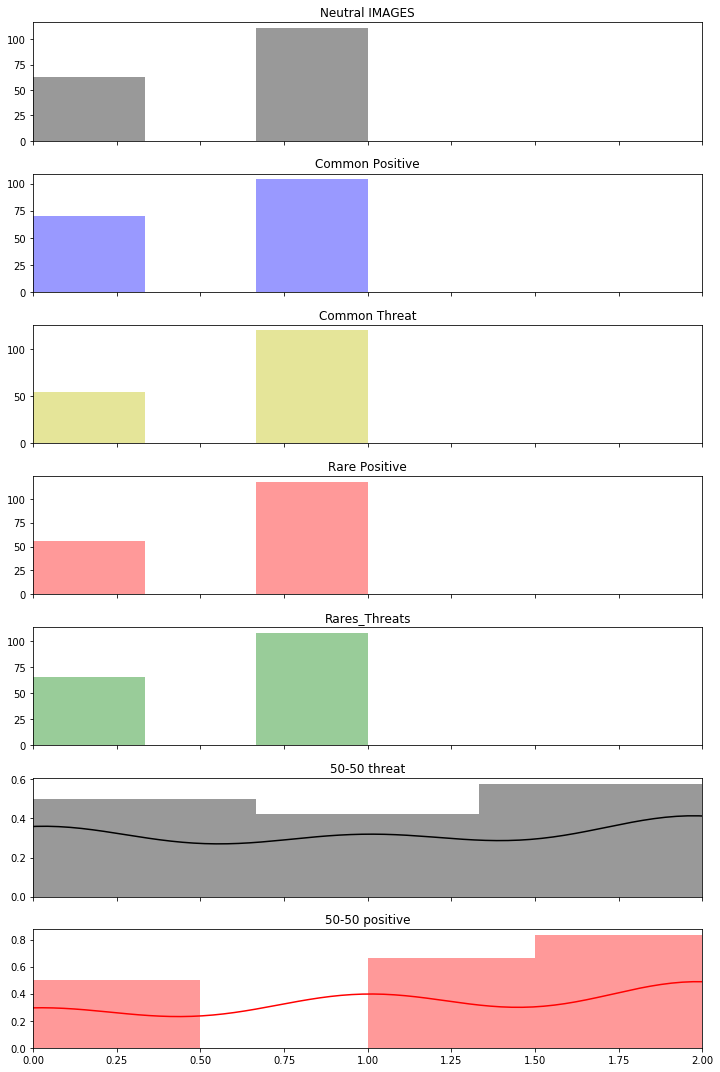

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from bayesian_bootstrap.bootstrap import mean, highest_density_interval
import pandas as pd
from scipy.stats import mode, ttest_rel
from scipy.stats import mode, ttest_1samp as t1
import numpy


print('50-50 bias positive {}'.format(np.mean(n1_pos)))
print('length: {}'.format(len(n1_pos)))
# 
unique, counts = numpy.unique(n1_pos, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('50-50 bias negative {}'.format(np.mean(n1_neg)))
print('length: {}'.format(len(n1_neg)))
# 
unique, counts = numpy.unique(n1_neg, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')


print('neutral IMAGES mean {}'.format(np.mean(n2)))
print('length: {}'.format(len(n2)))
unique, counts = numpy.unique(n2, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive mean {}'.format(np.mean(cp1)))
print('length: {}'.format(len(cp1)))
unique, counts = numpy.unique(cp1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common threat mean {}'.format(np.mean(ct1)))
print('length: {}'.format(len(ct1)))
unique, counts = numpy.unique(ct1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive mean {}'.format(np.mean(rp1)))
print('length: {}'.format(len(rp1)))
unique, counts = numpy.unique(rp1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat mean {}'.format(np.mean(rt1)))
print('length: {}'.format(len(rt1)))
unique, counts = numpy.unique(rt1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')
print('\n')

print('FIFTY CONDITIONS:')
print('common threat fifty mean {}'.format(np.mean(ctf)))
unique, counts = numpy.unique(ctf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive fifty mean {}'.format(np.mean(cpf)))
unique, counts = numpy.unique(cpf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive fifty mean {}'.format(np.mean(rpf)))
unique, counts = numpy.unique(rpf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat fifty mean {}'.format(np.mean(rtf)))
unique, counts = numpy.unique(rtf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('neutral fifty mean {}'.format(np.mean(n2f)))
unique, counts = numpy.unique(n2f, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')


print('Choosing action Model-Free RL would NOT predict:\n')
print('common threat non RL: {}'.format(np.mean(ct1_nonRL)))
unique, counts = numpy.unique(ct1_nonRL, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive non RL: {}'.format(np.mean(cp1_nonRL)))
unique, counts = numpy.unique(cp1_nonRL, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive non RL: {}'.format(np.mean(rp1_nonRL)))
unique, counts = numpy.unique(rp1_nonRL, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat non RL: {}'.format(np.mean(rt1_nonRL)))
unique, counts = numpy.unique(rt1_nonRL, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')



#graph distributions
f, axs = plt.subplots(7, 1, figsize=(10, 15),sharex=True)

ax0=sns.distplot(n2, hist=True,kde=False,color="k", ax=axs[0])
ax0.set(title='Neutral IMAGES',xlabel='')

ax1=sns.distplot(cp1, hist=True,kde=False,color="b", ax=axs[1])
ax1.set(title='Common Positive',xlabel='')

ax2=sns.distplot(ct1, hist=True,kde=False,color="y", ax=axs[2])
ax2.set(title='Common Threat',xlabel='')

ax3=sns.distplot(rp1, hist=True,kde=False,color="r", ax=axs[3])
ax3.set(title='Rare Positive',xlabel='')

ax4=sns.distplot(rt1, hist=True,kde=False,color="g", ax=axs[4])
ax4.set(title='Rares_Threats',xlabel='')

ax4=sns.distplot(n1_neg, hist=True,color="k", ax=axs[5])
ax4.set(title='50-50 threat',xlabel='')

ax4=sns.distplot(n1_pos, hist=True,color="r", ax=axs[6])
ax4.set(title='50-50 positive',xlabel='')

# ax4=sns.distplot(n1, hist=True,kde=False,color="k", ax=axs[5])
# ax4.set(title='neutral fifty',xlabel='')

plt.tight_layout()
plt.xlim(0, 2)
plt.show()

